# Exercise 5: Regularized Linear Regression and Bias v.s. Variance

## 1 Regularized Linear Regression

## 1.1 Visualizing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function
from PIL import Image
from scipy import optimize
import itertools

In [2]:
data = scipy.io.loadmat('data/ex5data1.mat')
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
Xtest, ytest = data['Xtest'], data['ytest']

X = np.insert(X, 0, 1, axis=1)
Xval = np.insert(Xval, 0, 1, axis=1)
Xtest = np.insert(Xtest, 0, 1, axis=1)

print('X.shape: ', X.shape)
print('y.shape: ', y.shape)
print('Xval.shape: ', Xval.shape)
print('yval.shape: ', yval.shape)
print('Xtest.shape: ', Xtest.shape)
print('ytest.shape: ', ytest.shape)

X.shape:  (12, 2)
y.shape:  (12, 1)
Xval.shape:  (21, 2)
yval.shape:  (21, 1)
Xtest.shape:  (21, 2)
ytest.shape:  (21, 1)


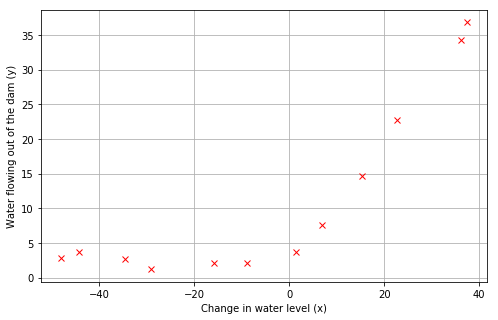

In [3]:
def plotData():
    plt.figure(figsize=(8, 5))
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.plot(X[:,1], y, 'rx')
    plt.grid(True)
    
plotData()

## 1.2 Regularized linear regression cost function

In [4]:
def h(theta, X):
    return np.dot(X, theta)

def linearRegCostFunction(theta, X, y, lamb=0.):
    theta = theta.reshape(-1, 1)
    m = X.shape[0]
    h_y = h(theta, X) - y
    return 1./(2*m)*np.sum(h_y**2) + float(lamb)/(2*m)*np.sum(theta[1:]**2)

In [5]:
# using theta initialized at [1; 1]. You should expect to see an output of 303.993.(with lambda=1)
print(linearRegCostFunction(np.ones([X.shape[1], 1]), X, y, 1.))

303.99319222


## 1.3 Regularized linear regression gradient

In [6]:
def computeGradient(theta, X, y, lamb=0.):
    theta = theta.reshape(-1, 1)
    m = X.shape[0]
    h_y = h(theta, X) - y
    theta_1 = theta[1:]
    grad = 1./m*np.dot(X.T, h_y)
    grad[1:] += lamb/m*theta_1
    return grad

# 最优算法使用的梯度必须是一维横向数组
def computeGradientFlattened(theta, X, y, lamb=0.):
    grad = computeGradient(theta, X, y, lamb)
    return grad.ravel()

In [7]:
# using theta initialized at [1; 1]. You should expect to see a gradient of [-15.30; 598.250].(with lambda=1)
print(computeGradient(np.ones([X.shape[1], 1]), X, y, 1.))

[[ -15.30301567]
 [ 598.25074417]]


## 1.4 Fitting linear regression

In [8]:
def optimizeTheta(initial_theta, X, y, lamb=0., print_output=True):
    optimize_theta = scipy.optimize.fmin_cg(linearRegCostFunction, x0=initial_theta,\
                                       fprime=computeGradientFlattened,\
                                       args=(X, y, lamb),\
                                       disp=print_output)
    return optimize_theta.reshape(initial_theta.shape[0], 1)

Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


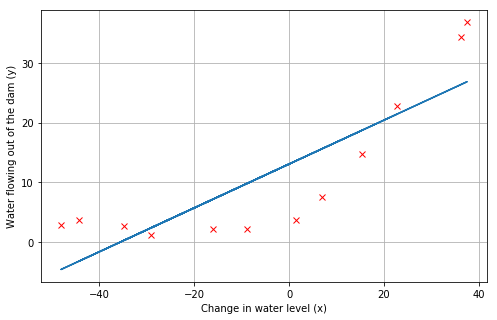

In [9]:
# 最优算法使用的theta必须是一维横向数组
initial_theta = np.ones([X.shape[1], 1]).ravel()
optimize_theta = optimizeTheta(initial_theta, X, y, 1)

plotData()
plt.plot(X[:,1], h(optimize_theta, X).flatten())
plt.show()

## 2 Bias-variance

## 2.1 Learning curves

In [10]:
def plotLearningCurve():
    theta_initial = np.array([[1.],[1.]])
    m, error_train, error_cv = [], [], []
    for n in range(1,13,1):
        train_X = X[:n, :]
        train_y = y[:n]
        m.append(train_y.shape[0])
        optimize_theta = optimizeTheta(theta_initial, train_X, train_y, lamb=0., print_output=False)
        error_train.append(linearRegCostFunction(optimize_theta, train_X, train_y, lamb=0.))
        error_cv.append(linearRegCostFunction(optimize_theta, Xval, yval, lamb=0.))
        
    plt.figure(figsize=(8,5))
    plt.plot(m, error_train, label='Train')
    plt.plot(m, error_cv, label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.grid(True)

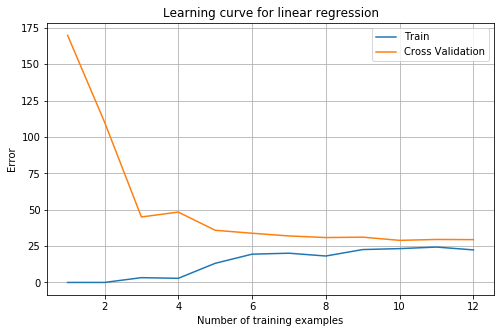

In [11]:
plotLearningCurve()

## 3 Polynomial regression

In [12]:
def genPolyFeatures(X, p):
    new_X = X.copy()
    for i in range(p):
        dim = i+2
        new_X = np.insert(new_X, new_X.shape[1], np.power(new_X[:, 1], dim), axis=1)
    return new_X

def featureNormalize(X):
    norm_X = X.copy()
    mu = np.mean(norm_X, axis=0)
    norm_X[:, 1:] = norm_X[:, 1:] - mu[1:]
    sigma = np.std(norm_X, axis=0, ddof=1)
    norm_X[:, 1:] = norm_X[:, 1:] / sigma[1:]
    return norm_X, mu, sigma

## 3.1 Learning Polynomial Regression

In [13]:
global_d = 5
poly_X = genPolyFeatures(X,global_d)
poly_X_norm, mu, sigma = featureNormalize(poly_X)
initial_theta = np.ones([poly_X_norm.shape[1], 1])
optimize_theta = optimizeTheta(initial_theta, poly_X_norm, y, 0.)
print(optimize_theta)

Optimization terminated successfully.
         Current function value: 0.198053
         Iterations: 284
         Function evaluations: 522
         Gradient evaluations: 522
[[ 11.21758933]
 [ 11.37505288]
 [ 13.43901998]
 [ 10.71989663]
 [ -4.41183439]
 [-11.89635005]
 [ -5.0953158 ]]


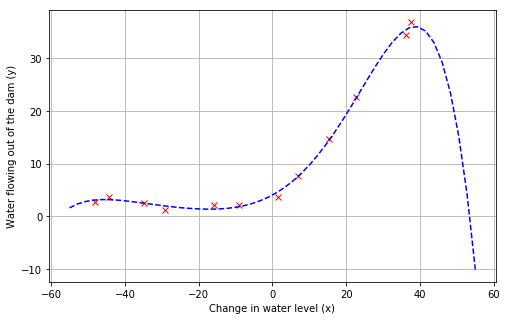

In [14]:
def plotFit(theta, mu, sigma):
    n_points_to_plot = 50
    xvals = np.linspace(-55, 55, n_points_to_plot)
    xmat = np.ones([n_points_to_plot, 1])
    
    xmat = np.insert(xmat, xmat.shape[1], xvals.T, axis=1)
    xmat = genPolyFeatures(xmat, len(theta)-2)
    #This is undoing feature normalization
    xmat[:, 1:] = xmat[:, 1:] - mu[1:]
    xmat[:, 1:] = xmat[:, 1:] / sigma[1:]
    plotData()
    plt.plot(xvals, h(theta, xmat), 'b--')

plotFit(optimize_theta, mu, sigma)

/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:158: RuntimeWarning: invalid value encountered in absolute
  return numpy.amax(numpy.abs(x))


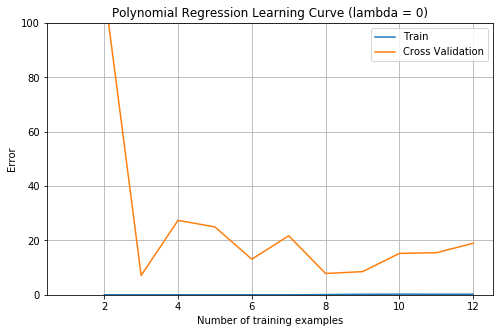

In [15]:
def plotPolyLearningCurve(lamb=0.):

    initial_theta = np.ones([global_d+2, 1])
    m, error_train, error_cv = [], [], []
    myXval, dummy1, dummy2 = featureNormalize(genPolyFeatures(Xval, global_d))

    for x in range(1, 13, 1):
        train_X = X[:x, :]
        train_y = y[:x]
        m.append(train_y.shape[0])
        train_subset = genPolyFeatures(train_X, global_d)
        train_subset, dummy1, dummy2 = featureNormalize(train_subset)
        
        optimize_theta = optimizeTheta(initial_theta, train_subset, train_y, lamb=lamb, print_output=False)
        
        error_train.append(linearRegCostFunction(optimize_theta, train_subset, train_y, lamb=lamb))
        error_cv.append(linearRegCostFunction(optimize_theta, myXval, yval, lamb=lamb))

    plt.figure(figsize=(8,5))
    plt.plot(m, error_train, label='Train')
    plt.plot(m, error_cv, label='Cross Validation')
    plt.legend()
    plt.title('Polynomial Regression Learning Curve (lambda = 0)')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.ylim([0,100]) 
    plt.grid(True)

plotPolyLearningCurve()

## 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter

Optimization terminated successfully.
         Current function value: 7.338822
         Iterations: 14
         Function evaluations: 29
         Gradient evaluations: 29


/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/mvpzhao/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:158: RuntimeWarning: invalid value encountered in absolute
  return numpy.amax(numpy.abs(x))


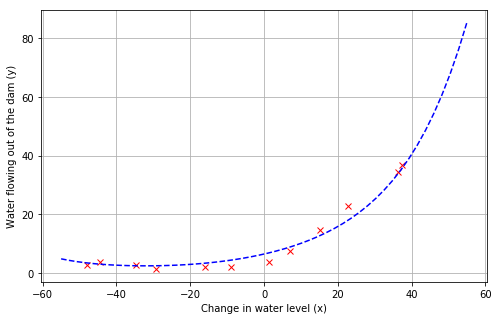

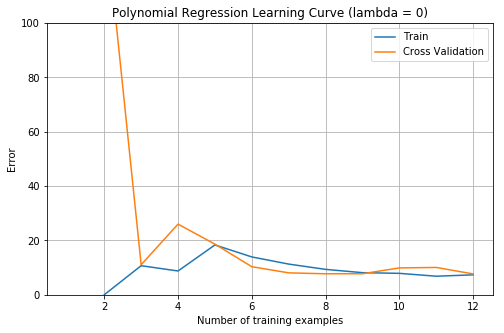

In [16]:
theta = np.zeros([poly_X_norm.shape[1], 1])
optimize_theta = optimizeTheta(theta, poly_X_norm, y, 1.)
plotFit(optimize_theta, mu, sigma)
plotPolyLearningCurve(1.)

Optimization terminated successfully.
         Current function value: 67.547554
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 11


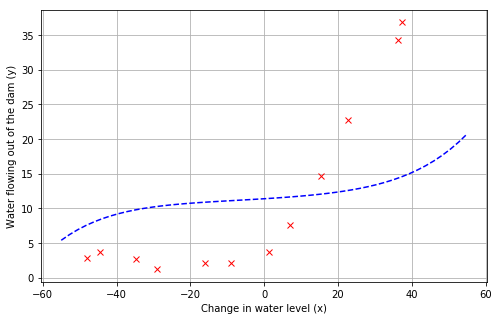

In [17]:
# Try Lambda = 100
theta = np.random.rand(poly_X_norm.shape[1], 1)
fit_theta = optimizeTheta(theta, poly_X_norm, y, 100.)
plotFit(fit_theta, mu, sigma)

## 3.3 Selecting λ using a cross validation set

In [25]:
# lambdas = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
lambdas = np.linspace(0, 5, 20)
errors_train, errors_cv = [], []
for lamb in lambdas:
    train_X = genPolyFeatures(X, global_d)
    train_X_norm, dummy1, dummy2 = featureNormalize(train_X)
    
    train_Xval = genPolyFeatures(Xval, global_d)
    train_Xval_norm, dummy1, dummy2 = featureNormalize(train_Xval)
    
    theta = np.random.rand(train_X_norm.shape[1], 1)
    
    optimize_theta = optimizeTheta(theta, train_X_norm, y, lamb, False)
    
    errors_train.append(linearRegCostFunction(optimize_theta, train_X_norm, y, lamb=lamb))
    errors_cv.append(linearRegCostFunction(optimize_theta, train_Xval_norm, yval, lamb=lamb))

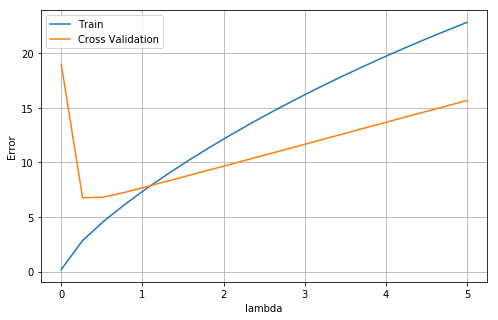

In [27]:
plt.figure(figsize=(8,5))
plt.plot(lambdas, errors_train, label='Train')
plt.plot(lambdas, errors_cv, label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)